## Análisis de datos - Clase 4

### Discretización

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import KBinsDiscretizer

In [2]:
# Cargamos el dataset de ejemplo (penguins)
penguins = sns.load_dataset("penguins").dropna()

# split 80%/20% (sin target definido)
df, test_df = train_test_split(penguins, test_size=0.2, random_state=42)

print(df.shape, test_df.shape)

(266, 7) (67, 7)


In [3]:
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
230,Gentoo,Biscoe,40.9,13.7,214.0,4650.0,Female
84,Adelie,Dream,37.3,17.8,191.0,3350.0,Female
303,Gentoo,Biscoe,50.0,15.9,224.0,5350.0,Male
22,Adelie,Biscoe,35.9,19.2,189.0,3800.0,Female
29,Adelie,Biscoe,40.5,18.9,180.0,3950.0,Male


In [4]:
# Seleccionamos una variable continua para discretizar
variable = "bill_length_mm"

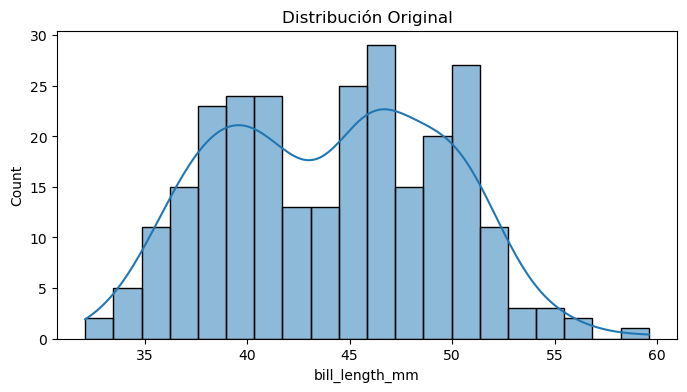

In [5]:
# Visualizamos la distribución original
fig, ax = plt.subplots(figsize=(8,4))

sns.histplot(df[variable], bins=20, kde=True, ax=ax)
ax.set_title("Distribución Original")
plt.show()

#### Función auxiliar para mostrar resultados

In [6]:
def plot(new_var):
    fig, axes = plt.subplots(1, 3, figsize=(14, 4))
    sns.histplot(data=df, x=variable, hue=new_var, multiple="stack", bins=30, palette="Set2", ax=axes[0])
    axes[0].set_title(f"Histograma por categoría ({new_var})")
    axes[0].set_xlabel(variable)
    axes[0].set_ylabel("Frecuencia")

    sns.scatterplot(data=df, x=df.index, y=variable, hue=new_var, palette="Set2", ax=axes[1])
    axes[1].set_title('Discretización')
    axes[1].set_ylabel("Categoría")
    axes[1].set_xlabel(variable)

    sns.countplot(x=new_var, data=df, hue=new_var, palette="Set2", ax=axes[2])
    axes[2].set_xlabel("Categoría")
    axes[2].set_ylabel("Cantidad de pingüinos")
    axes[2].set_title("Distribución de pingüinos según longitud de pico")

    plt.tight_layout()
    plt.show()

#### Por intervalos iguales

In [7]:
# Discretización por intervalos de igual amplitud
df["equal_width"] = pd.cut(df[variable], bins=4, labels=["Corto", "Medio", "Largo", "Muy Largo"])
df.head(10)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,equal_width
230,Gentoo,Biscoe,40.9,13.7,214.0,4650.0,Female,Medio
84,Adelie,Dream,37.3,17.8,191.0,3350.0,Female,Corto
303,Gentoo,Biscoe,50.0,15.9,224.0,5350.0,Male,Largo
22,Adelie,Biscoe,35.9,19.2,189.0,3800.0,Female,Corto
29,Adelie,Biscoe,40.5,18.9,180.0,3950.0,Male,Medio
257,Gentoo,Biscoe,44.4,17.3,219.0,5250.0,Male,Medio
334,Gentoo,Biscoe,46.2,14.1,217.0,4375.0,Female,Largo
244,Gentoo,Biscoe,42.9,13.1,215.0,5000.0,Female,Medio
183,Chinstrap,Dream,54.2,20.8,201.0,4300.0,Male,Muy Largo
88,Adelie,Dream,38.3,19.2,189.0,3950.0,Male,Corto


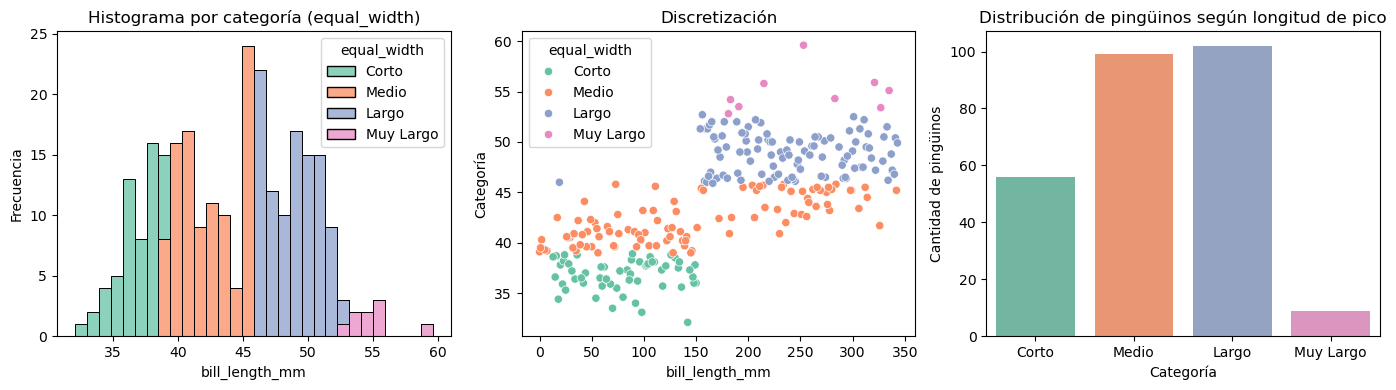

In [8]:
plot('equal_width')

#### Por intervalos de igual frecuencia

In [9]:
# Discretización por intervalos de igual frecuencia
df["equal_freq"], bins = pd.qcut(df[variable], q=4, labels=["Muy Corto", "Corto", "Medio", "Largo"], retbins=True)
df.head(10)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,equal_width,equal_freq
230,Gentoo,Biscoe,40.9,13.7,214.0,4650.0,Female,Medio,Corto
84,Adelie,Dream,37.3,17.8,191.0,3350.0,Female,Corto,Muy Corto
303,Gentoo,Biscoe,50.0,15.9,224.0,5350.0,Male,Largo,Largo
22,Adelie,Biscoe,35.9,19.2,189.0,3800.0,Female,Corto,Muy Corto
29,Adelie,Biscoe,40.5,18.9,180.0,3950.0,Male,Medio,Corto
257,Gentoo,Biscoe,44.4,17.3,219.0,5250.0,Male,Medio,Corto
334,Gentoo,Biscoe,46.2,14.1,217.0,4375.0,Female,Largo,Medio
244,Gentoo,Biscoe,42.9,13.1,215.0,5000.0,Female,Medio,Corto
183,Chinstrap,Dream,54.2,20.8,201.0,4300.0,Male,Muy Largo,Largo
88,Adelie,Dream,38.3,19.2,189.0,3950.0,Male,Corto,Muy Corto


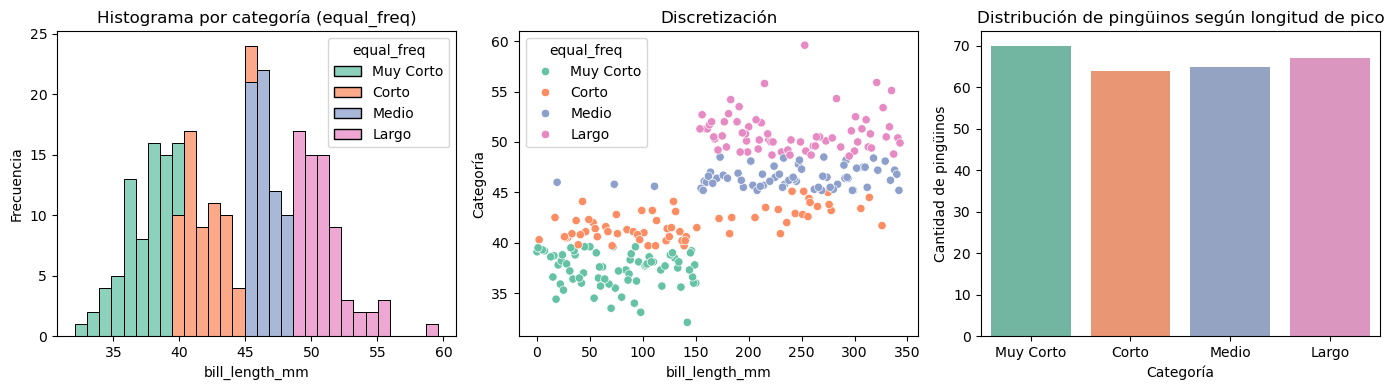

In [10]:
plot('equal_freq')

#### Discretización por puntos de corte

In [11]:
# Cuantiles
kbin_quantile = KBinsDiscretizer(n_bins=4, encode='ordinal', strategy='quantile')
df["kbin_quantile"] = kbin_quantile.fit_transform(df[[variable]]).astype(int)
df.head(10)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,equal_width,equal_freq,kbin_quantile
230,Gentoo,Biscoe,40.9,13.7,214.0,4650.0,Female,Medio,Corto,1
84,Adelie,Dream,37.3,17.8,191.0,3350.0,Female,Corto,Muy Corto,0
303,Gentoo,Biscoe,50.0,15.9,224.0,5350.0,Male,Largo,Largo,3
22,Adelie,Biscoe,35.9,19.2,189.0,3800.0,Female,Corto,Muy Corto,0
29,Adelie,Biscoe,40.5,18.9,180.0,3950.0,Male,Medio,Corto,1
257,Gentoo,Biscoe,44.4,17.3,219.0,5250.0,Male,Medio,Corto,1
334,Gentoo,Biscoe,46.2,14.1,217.0,4375.0,Female,Largo,Medio,2
244,Gentoo,Biscoe,42.9,13.1,215.0,5000.0,Female,Medio,Corto,1
183,Chinstrap,Dream,54.2,20.8,201.0,4300.0,Male,Muy Largo,Largo,3
88,Adelie,Dream,38.3,19.2,189.0,3950.0,Male,Corto,Muy Corto,0


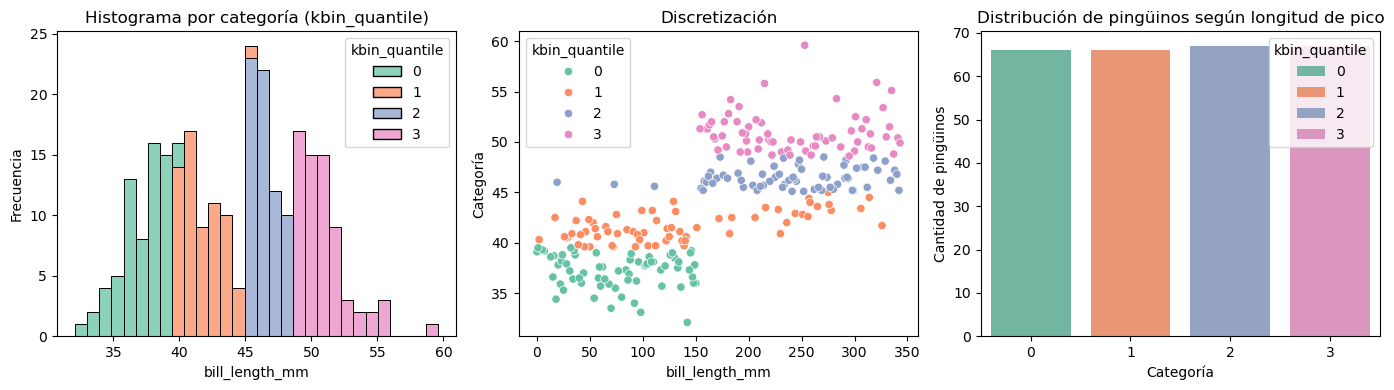

In [12]:
plot('kbin_quantile')

#### Con K-means

In [13]:
# K-means
kbin_kmeans = KBinsDiscretizer(n_bins=4, encode='ordinal', strategy='kmeans')
df["kbin_kmeans"] = kbin_kmeans.fit_transform(df[[variable]]).astype(int)
df.head(10)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,equal_width,equal_freq,kbin_quantile,kbin_kmeans
230,Gentoo,Biscoe,40.9,13.7,214.0,4650.0,Female,Medio,Corto,1,1
84,Adelie,Dream,37.3,17.8,191.0,3350.0,Female,Corto,Muy Corto,0,0
303,Gentoo,Biscoe,50.0,15.9,224.0,5350.0,Male,Largo,Largo,3,3
22,Adelie,Biscoe,35.9,19.2,189.0,3800.0,Female,Corto,Muy Corto,0,0
29,Adelie,Biscoe,40.5,18.9,180.0,3950.0,Male,Medio,Corto,1,1
257,Gentoo,Biscoe,44.4,17.3,219.0,5250.0,Male,Medio,Corto,1,2
334,Gentoo,Biscoe,46.2,14.1,217.0,4375.0,Female,Largo,Medio,2,2
244,Gentoo,Biscoe,42.9,13.1,215.0,5000.0,Female,Medio,Corto,1,1
183,Chinstrap,Dream,54.2,20.8,201.0,4300.0,Male,Muy Largo,Largo,3,3
88,Adelie,Dream,38.3,19.2,189.0,3950.0,Male,Corto,Muy Corto,0,0


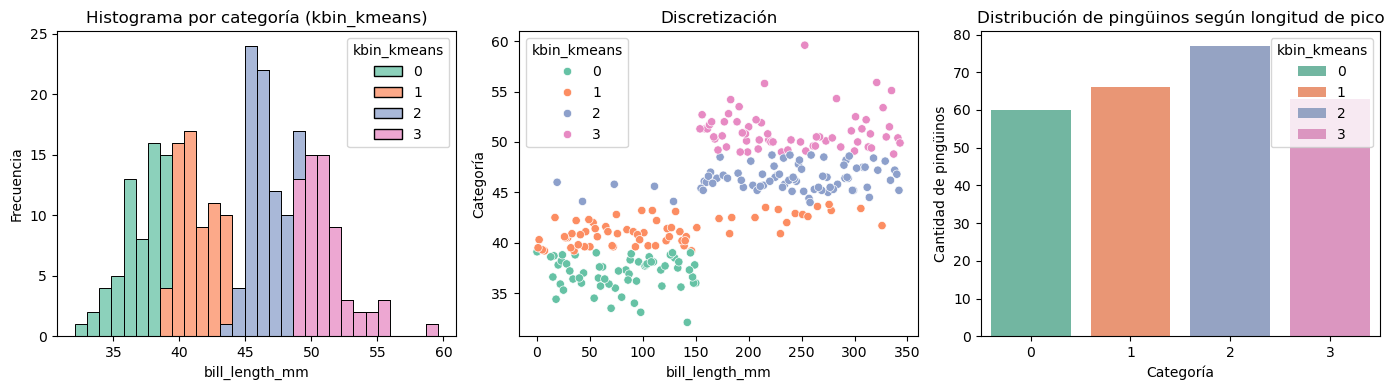

In [14]:
plot('kbin_kmeans')

#### Comparación de resultados

In [15]:
# Resultados
penguins_disc = df[[variable, "equal_width", "equal_freq", "kbin_quantile", "kbin_kmeans"]]
penguins_disc

,bill_length_mm,equal_width,equal_freq,kbin_quantile,kbin_kmeans
230,40.9,Medio,Corto,1,1
84,37.3,Corto,Muy Corto,0,0
303,50.0,Largo,Largo,3,3
22,35.9,Corto,Muy Corto,0,0
29,40.5,Medio,Corto,1,1
...,...,...,...,...,...
194,50.9,Largo,Largo,3,3
77,37.2,Corto,Muy Corto,0,0
112,39.7,Medio,Corto,1,1
277,45.5,Medio,Medio,2,2


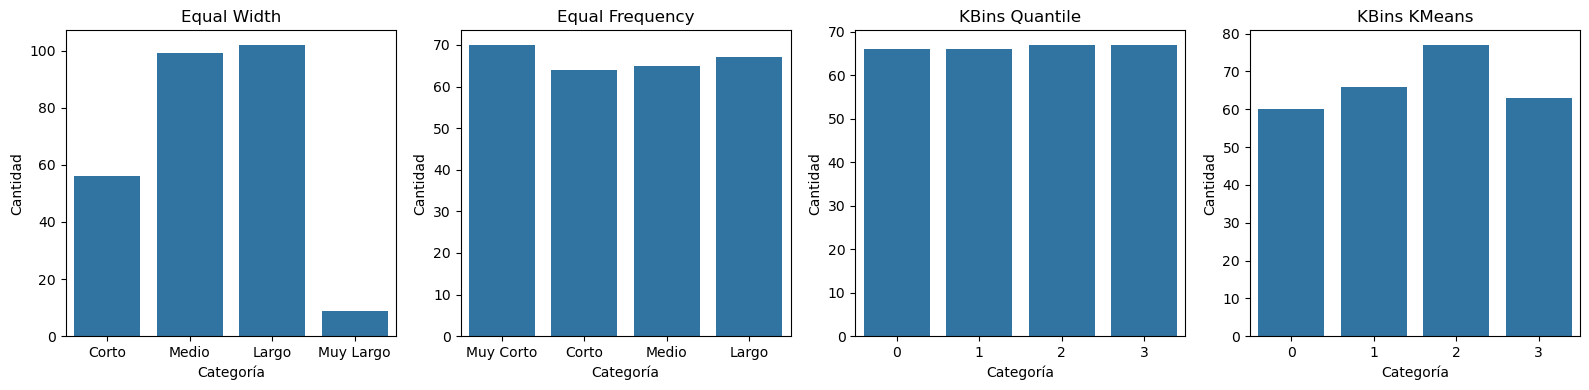

In [16]:
fig, axes = plt.subplots(1, 4, figsize=(16, 4))

cols = ["equal_width", "equal_freq", "kbin_quantile", "kbin_kmeans"]
titles = ["Equal Width", "Equal Frequency", "KBins Quantile", "KBins KMeans"]

for i, col in enumerate(cols):
    sns.countplot(x=col, data=df, ax=axes[i])
    axes[i].set_title(titles[i])
    axes[i].set_xlabel("Categoría")
    axes[i].set_ylabel("Cantidad")

fig.tight_layout()
plt.show()
